In [2]:
# Load CSV file from my google drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
path = "/content/drive/MyDrive/Colab Notebooks/fcc-forum-pageviews.csv"
df = pd.read_csv(path).set_index('date')
df.index = pd.to_datetime(df.index)

In [4]:
print(df)

             value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]


In [5]:
# Clean data
df = df.loc[ (df["value"] < df["value"].quantile(0.975) ) & (df["value"] > df["value"].quantile(0.025) ) ]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

print(df)

             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]


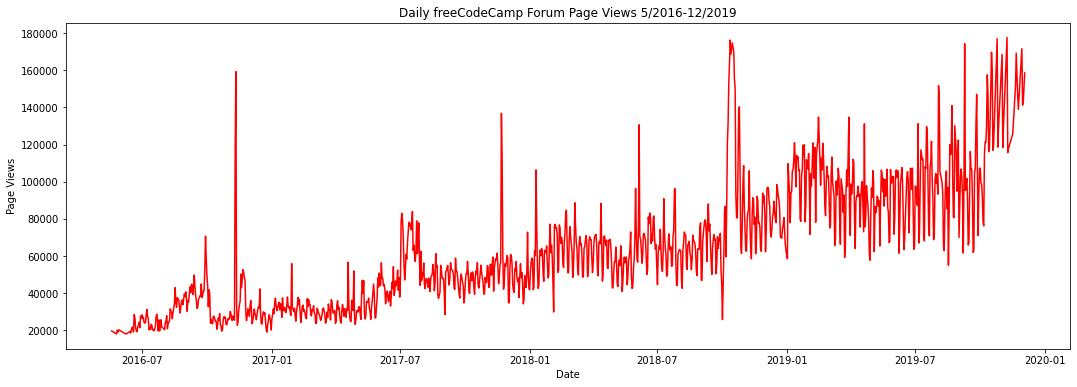

In [7]:
# Draw line plot

plt.subplots(figsize = (18, 6))
plt.plot(df.index, df['value'], color="red")
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

Text(0, 0.5, 'Average Page Views')

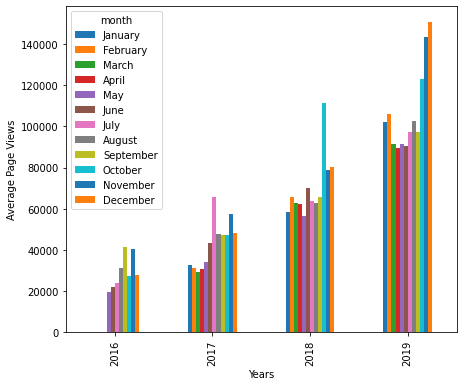

In [20]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()

df_bar
# Draw bar plot

df_bar['month'] = df_bar.index.month
df_bar['year'] = df_bar.index.year
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar['month'] = df_bar['month'].apply(lambda data: months[data-1])
df_bar['month'] = pd.Categorical(df_bar['month'], categories = months)

df_pivot = pd.pivot_table(
  df_bar,
  values = 'value',
  index = 'year',
  columns = 'month',
  aggfunc = np.mean
)

ax = df_pivot.plot(kind = 'bar')
fig = ax.get_figure()
fig.set_size_inches(7, 6)
      
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')



[Text(0, 0.5, 'Page Views'), Text(0.5, 0, 'Month')]

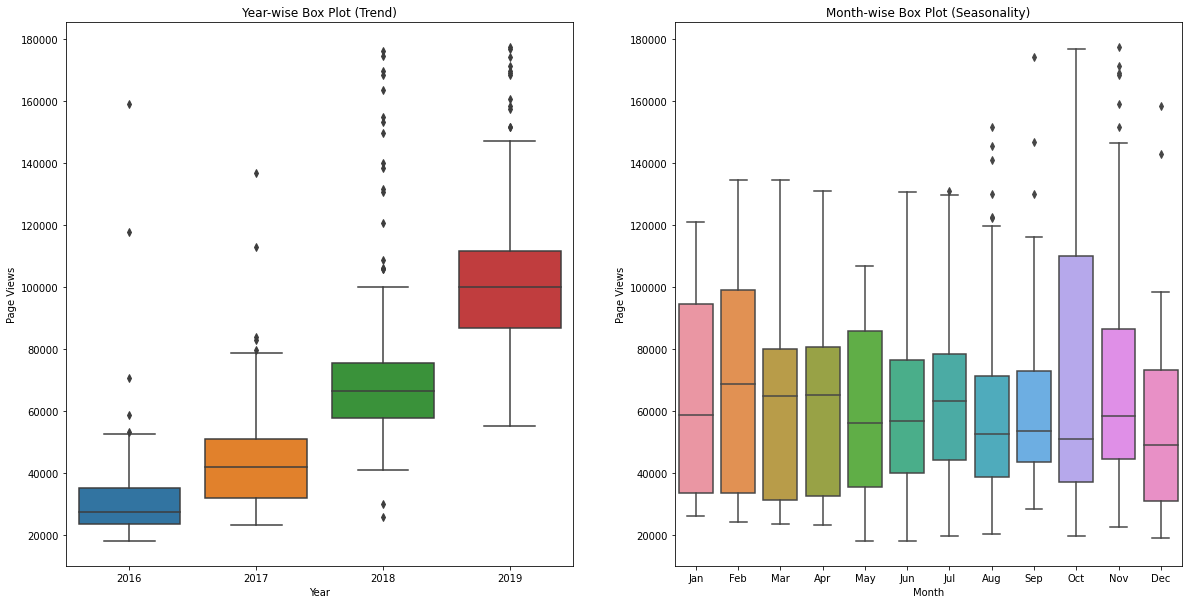

In [24]:
# Prepare data for box plots
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box
# Draw box plots (using Seaborn)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

axs[0].set_title('Year-wise Box Plot (Trend)')
axs[1].set_title('Month-wise Box Plot (Seasonality)')

sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axs[0]).set(xlabel = 'Year', ylabel = 'Page Views')
sns.boxplot(x = df_box['month'], y = df_box['value'], 
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax = axs[1]).set(xlabel = 'Month', ylabel = 'Page Views')
